In [98]:
# Importing the packages

In [99]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [100]:
# load and review data

In [101]:
df=pd.read_csv("E:\Imarticus\Machine Learning\Paper2/credit_card.csv")

In [102]:
df.head(10)# shows the first 10 data points

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [103]:
df.shape  #shows the dimensitionals of the data

(8950, 18)

In [104]:
df.shape[1] #No.of.columns

18

In [105]:
df.columns #columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [106]:
cat_col=df.select_dtypes(include='O').columns
num_col=df.select_dtypes(exclude='O').columns

In [107]:
print("categorical_columns :",cat_col) #categorical columns

categorical_columns : Index(['CUST_ID'], dtype='object')


In [108]:
print("Numerical_columns :",num_col) #Numerical columns

Numerical_columns : Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [110]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [111]:
df.drop('CUST_ID',axis = 1,inplace = True)

# a) Missing Values

In [112]:
missing_values = [[i ,"=>",df[i].isnull().sum()] for i in df.columns if df[i].isnull().sum() > 0] #checking for missing values

In [113]:
missing_values # columns which have missing values

[['CREDIT_LIMIT', '=>', 1], ['MINIMUM_PAYMENTS', '=>', 313]]

<AxesSubplot:>

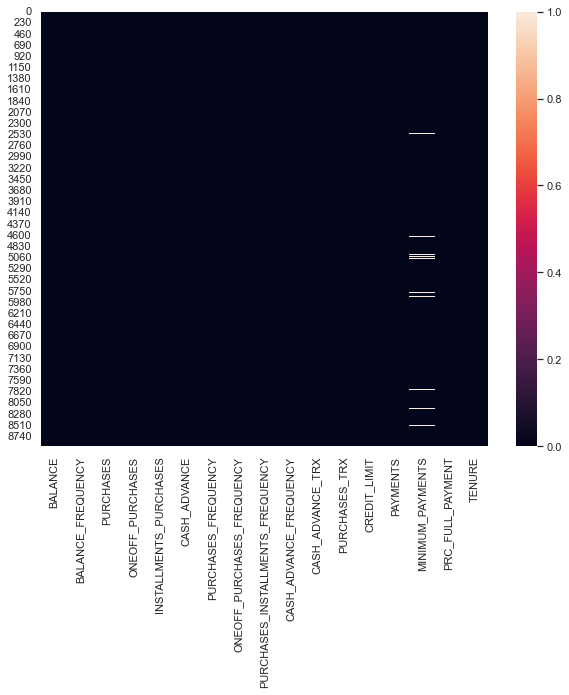

In [114]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isna())

### There are 313 missing values in MINIMUM_PAYMENTS and 1 missing valu in CREDIT_LIMIT

# Treating the missing values

In [115]:
df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean()),inplace=True)

### Missing values are treated by filling the missing values using mean

<AxesSubplot:>

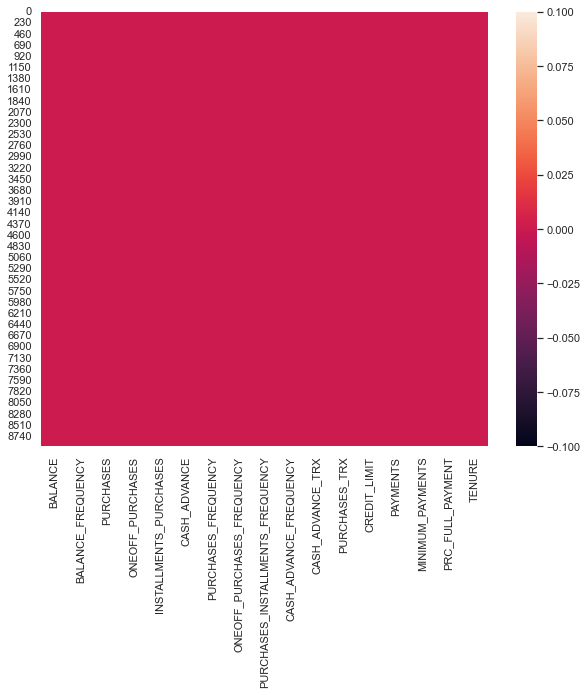

In [116]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isna())

# b)Outliers

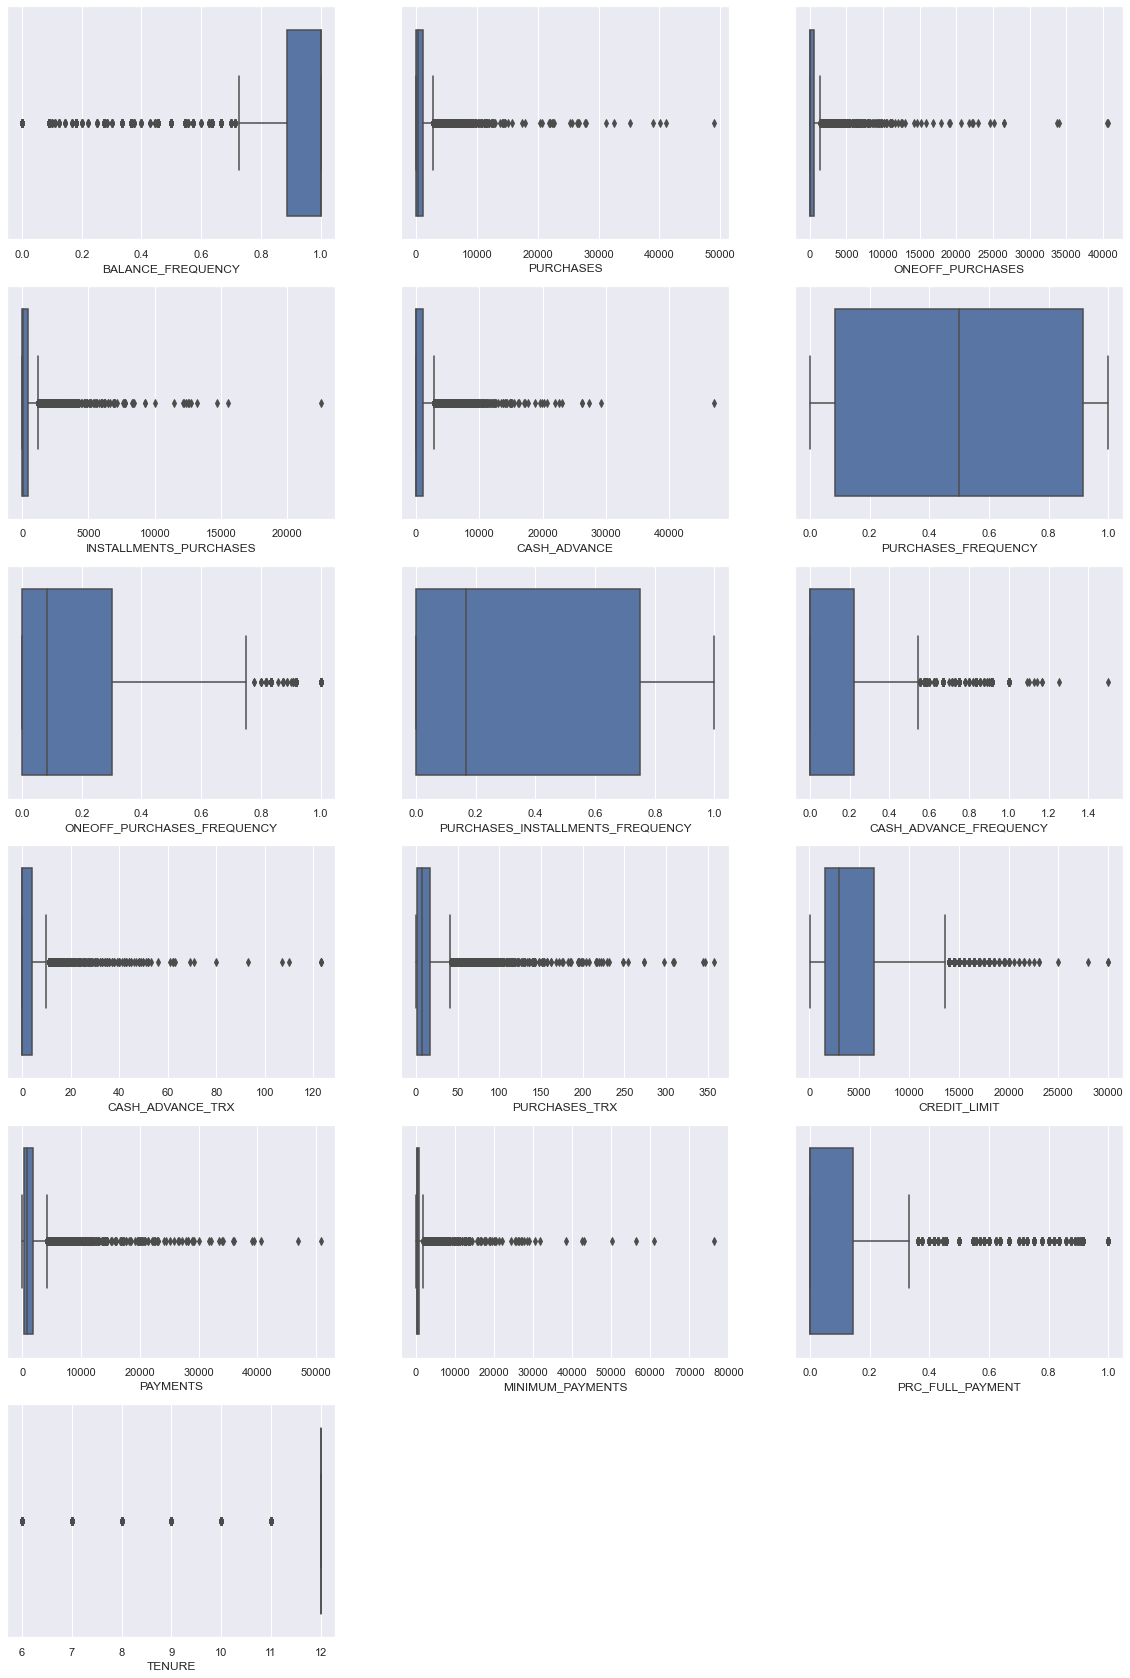

In [117]:
a=df.columns
plt.figure(figsize = (20,30))
for i in range(1, 17):
    plt.subplot(6, 3, i)
    sns.boxplot(x = a[i], data = df)

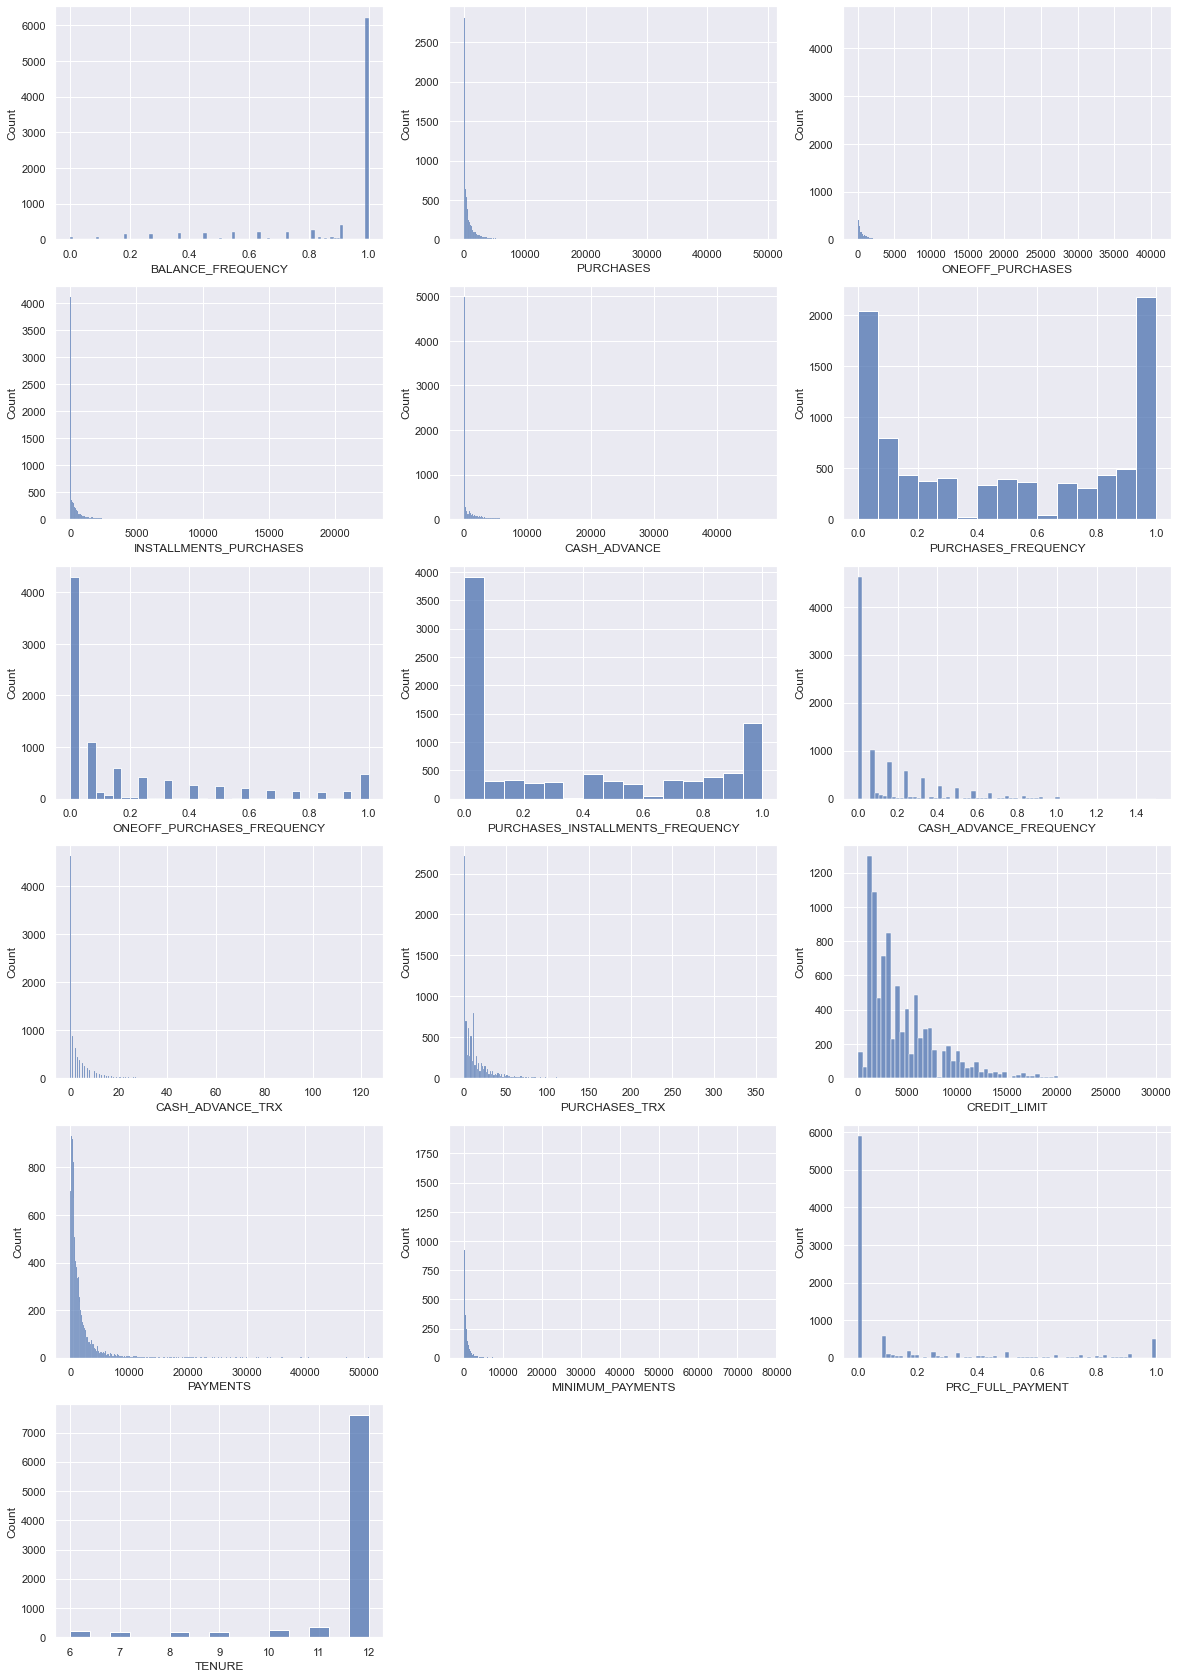

In [118]:
a=df.columns
plt.figure(figsize = (20,30))
for i in range(1, 17):
    plt.subplot(6, 3, i)
    sns.histplot(x = a[i], data = df)

In [119]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

### correlated variables

In [120]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df = df.drop(columns=to_drop, axis=1)
df

C:\Users\ajaya\AppData\Local\Temp/ipykernel_7436/618211414.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,0.00,169.554775,0.500000,0.500000,0.125000,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,163.31,0.000000,0.875000,0.000000,0.000000,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,1153.925205,0.000000,0.000000,0.125000,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,441.00,0.000000,0.750000,0.000000,0.000000,6,1000.0,169.249683,124.639905,0.000000,8


<AxesSubplot:>

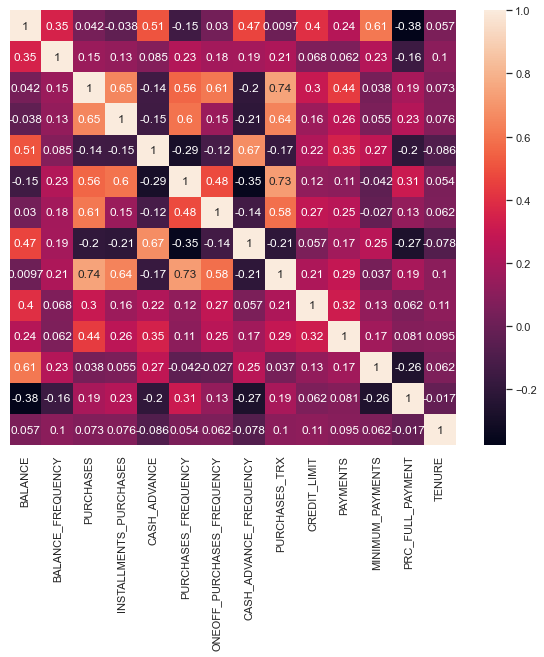

In [121]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

# PCA

In [122]:
from sklearn.decomposition import PCA

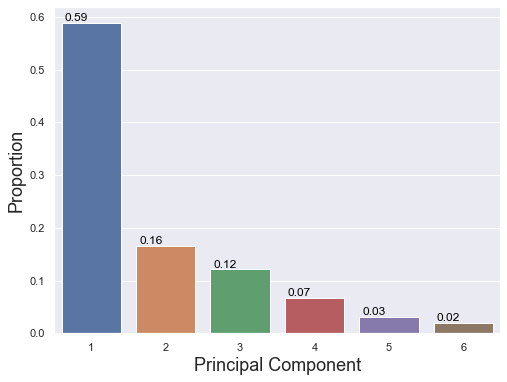

In [123]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

C:\Users\ajaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


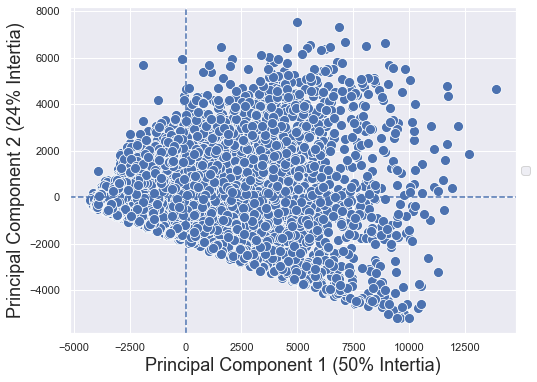

In [124]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6)) 
sns.scatterplot(x_pca[:,0],x_pca[:,1], 
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--') 
plt.axhline(0, ls='--') 
plt.show()

C:\Users\ajaya\AppData\Local\Temp/ipykernel_7436/1238262932.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


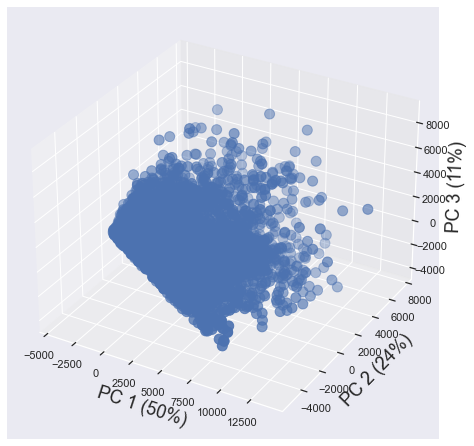

In [125]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6)) 
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], s=100, cmap="Set1")
ax.set_xlabel('PC 1 (50%)',fontsize=18)
ax.set_ylabel('PC 2 (24%)',fontsize=18)
ax.set_zlabel('PC 3 (11%)',fontsize=18) 
plt.show()

# k means

In [126]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,436.20,0.000000,1.000000,0.000000,0.000000,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,200.00,0.000000,0.333333,0.083333,0.000000,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,3,11000.0,1164.770591,100.302262,0.000000,12
10,1293.124939,1.000000,920.12,920.12,0.000000,1.000000,0.000000,0.000000,12,1200.0,1083.301007,2172.697765,0.000000,12


In [127]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(df)

# Build a Model with K means

In [128]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k , random_state=0)
    predict=cluster.fit_predict(df)
    
    score=silhouette_score(df , predict , random_state=0)
    print('for n_clusters={} , silhoutte score is {}'.format(k, score))

for n_clusters=2 , silhoutte score is 0.4521131625358664
for n_clusters=3 , silhoutte score is 0.43852974612301515
for n_clusters=4 , silhoutte score is 0.3605501004917412
for n_clusters=5 , silhoutte score is 0.3562657869148566
for n_clusters=6 , silhoutte score is 0.3274258710460645
for n_clusters=7 , silhoutte score is 0.32979793027838405
for n_clusters=8 , silhoutte score is 0.2573315430431648


# elbow method

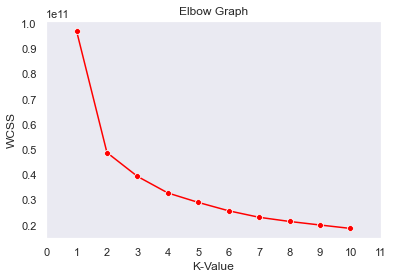

In [129]:
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="random", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

In [130]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 2, random_state=0)

# fit the model
predict=model.fit_predict(df)
score=silhouette_score(df , predict , random_state=0)
print('silhoutte score is {}'.format(score))

silhoutte score is 0.4521131625358664


In [131]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000000,12,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,1


In [132]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)                

(array([0, 1]), array([2308, 5126], dtype=int64))

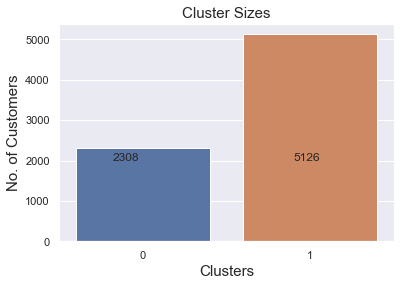

In [133]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])

plt.show()